# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6





Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.

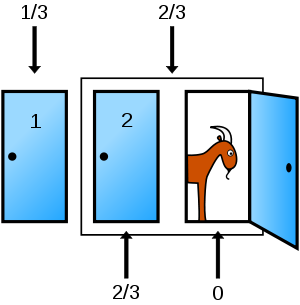






Zaimplementuj symulację paradoksu Monty'ego Halla. Przeprowadź eksperyment losowy, w którym gra zostanie rozegrana określoną liczbę razy (liczbę rozgrywek należy ustawić jako parametr programu).

### Zadanie 1

Symulację należy przeprowadzić w dwóch wariantach:

1. Gracz zawsze zostaje przy pierwotnie wybranej bramce.
2. Gracz zawsze zmienia swój wybór po tym, jak prowadzący ujawni jedną z bramek bez nagrody.

Po zakończeniu symulacji porównaj skuteczność obu strategii.

Odpowiedz na pytanie: **Czy uzyskane wyniki są zgodne z teorią paradoksu Monty'ego Halla?**





In [25]:
import random

def monty_hall_simulation(num_games):
    stay_wins = 0
    switch_wins = 0

    for _ in range(num_games):
        doors = [0, 0, 0]
        prize_door = random.randint(0, 2)
        doors[prize_door] = 1

        player_choice = random.randint(0, 2)

        available_doors = []
        for i in range(3):
            if i != player_choice and doors[i] == 0:
                available_doors.append(i)

        host_reveal = random.choice(available_doors)

        if doors[player_choice] == 1:
            stay_wins += 1

        remaining_doors = 0
        for i in range(3):
            if i != player_choice and i != host_reveal:
                remaining_doors = i

        new_choice = remaining_doors
        if doors[new_choice] == 1:
            switch_wins += 1

    return stay_wins, switch_wins

num_games = 10000
stay_wins, switch_wins = monty_hall_simulation(num_games)

print(f"Liczba gier: {num_games}")
print(f"Wygrane przy strategii pozostania: {stay_wins} ({(stay_wins / num_games) * 100:.2f}%)")
print(f"Wygrane przy strategii zmiany: {switch_wins} ({(switch_wins / num_games) * 100:.2f}%)")

Liczba gier: 10000
Wygrane przy strategii pozostania: 3319 (33.19%)
Wygrane przy strategii zmiany: 6681 (66.81%)


#### Zadanie 2

Napisz program, który umożliwia przeprowadzenie symulacji paradoksu Monty'ego Halla z dowolną liczbą bramek (możliwość podania tej liczby jako parametr).

Zasady symulacji:

* Gracz losowo wybiera jedną z $N$ bramek.
* Prowadzący odsłania jedną z pozostałych $N - 1$ bramek, za którą na pewno nie ma nagrody.
* Gracz następnie losowo wybiera jedną z pozostałych $N - 2$ bramek (innych niż pierwotny wybór oraz bramka odsłonięta przez prowadzącego).

W przypadku $N = 100$ gracz wybiera jedną ze 100 bramek, prowadzący odsłania jedną (w której nie ma nagrody) z 99 pozostałych, a następnie gracz wybiera losowo jedną z 98 bramek.

Na koniec porównaj skuteczność strategii "pozostania przy wyborze" oraz "zmiany wyboru" (losowej zmiany wśród dostępnych opcji).



In [ ]:
def monty_hall_simulation_many_doors(num_games=1000, doors = 100):
    stay_wins = 0
    switch_wins = 0

    for _ in range(num_games):
        doors_list = [0] * doors
        prize_door = random.randint(0, doors - 1)
        doors_list[prize_door] = 1

        player_choice = random.randint(0, doors - 1)

        available_doors = []
        for i in range(doors):
            if i != player_choice and doors_list[i] == 0:
                available_doors.append(i)

        host_reveal = random.choice(available_doors)

        if doors_list[player_choice] == 1:
            stay_wins += 1

        remaining_doors = 0
        for i in range(doors):
            if i != player_choice and i != host_reveal:
                remaining_doors = i

        new_choice = remaining_doors
        if doors_list[new_choice] == 1:
            switch_wins += 1

    return stay_wins, switch_wins


num_games = 10000
doors = 100
stay_wins, switch_wins = monty_hall_simulation_many_doors(num_games, doors)

print(f"Liczba gier: {num_games}")
print(f"Liczba drzwi: {doors}")
print(f"Wygrane przy strategii pozostania: {stay_wins} ({(stay_wins / num_games) * 100:.2f}%)")
print(f"Wygrane przy strategii zmiany: {switch_wins} ({(switch_wins / num_games) * 100:.2f}%)")

Liczba gier: 1000
Liczba drzwi: 100
Wygrane przy strategii pozostania: 9 (0.90%)
Wygrane przy strategii zmiany: 13 (1.30%)


#### Zadanie 3

Przeanalizuj, jak liczba bramek wpływa na prawdopodobieństwo wygranej w każdej ze strategii. Wyświetl wykres przedstawiający prawdopodobieństwo wygranej w zależności od liczby bramek dla obu strategii (jako dwie serie danych).

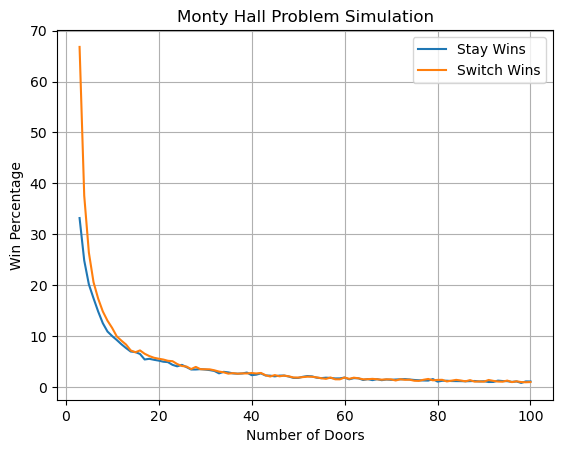

In [33]:
import matplotlib.pyplot as plt

doors_number = list(range(3, 101))
num_games = 10000

stay_wins = []
switch_wins = []

for doors in doors_number:
    stay_wins_temp, switch_wins_temp = monty_hall_simulation_many_doors(num_games, doors)
    stay_wins.append(stay_wins_temp*100/num_games)
    switch_wins.append(switch_wins_temp*100/num_games)

plt.plot(doors_number, stay_wins, label='Stay Wins')
plt.plot(doors_number, switch_wins, label='Switch Wins')
plt.xlabel('Number of Doors')
plt.ylabel('Win Percentage')
plt.title('Monty Hall Problem Simulation')
plt.legend()
plt.grid()
plt.show()